# Problem 1

## 1a)

In [1]:
import pandas as pd

df_spam = pd.read_csv('spambase.csv')
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
from sklearn.preprocessing import StandardScaler

columns_spam = df_spam.columns.tolist()
columns_spam.remove('class')

std_scaler = StandardScaler()
for column in columns_spam:
    df_spam[column] = std_scaler.fit_transform(df_spam[column].values.reshape(-1,1))
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_spam = df_spam[columns_spam]
y_spam = df_spam['class']

X_spam_train,X_spam_test,y_spam_train,y_spam_test=train_test_split(X_spam,y_spam,test_size=0.25)

reg_spam = LogisticRegression()
reg_spam.fit(X_spam_train,y_spam_train)

y_spam_pred=reg_spam.predict(X_spam_test)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm_spam = metrics.confusion_matrix(y_spam_test, y_spam_pred)
print(cm_spam)

ax= plt.subplot()
sns.heatmap(cm_spam, annot=True, fmt="g", ax=ax);
ax.set_xlabel('Predicted Label');ax.set_ylabel('Actual Label'); 
ax.set_title('Spam Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

[[670  35]
 [ 53 393]]


In [5]:
cm_spam_tp = cm_spam[0][0]
cm_spam_fp = cm_spam[1][0]
cm_spam_tn = cm_spam[1][1]
cm_spam_fn = cm_spam[0][1]
print("True Positives: " + str(cm_spam_tp) + "\nFalse Positives: " + str(cm_spam_fp) + "\nTrue Negatives: " + str(cm_spam_tn) + "\nFalse Negatives: " + str(cm_spam_fn))

accuracy_spam = (cm_spam_tp + cm_spam_tn) / (cm_spam_tp + cm_spam_tn + cm_spam_fp + cm_spam_fn)
error_spam = 1 - accuracy_spam
precision_spam = cm_spam_tp / (cm_spam_tp + cm_spam_fp)
recall_spam = cm_spam_tp / (cm_spam_tp + cm_spam_fn)
f1_score_spam = 2 * (precision_spam * recall_spam)/(precision_spam + recall_spam)
print("Accuracy: " + str(accuracy_spam) + "\nError: " + str(error_spam) + "\nPrecision: " + str(precision_spam) + "\nRecall: " + str(recall_spam) + "\nF1 Score: " + str(f1_score_spam))

True Positives: 670
False Positives: 53
True Negatives: 393
False Negatives: 35
Accuracy: 0.9235447437011295
Error: 0.07645525629887051
Precision: 0.9266943291839558
Recall: 0.950354609929078
F1 Score: 0.938375350140056


## 1b)

In [6]:
for idx in range(len(columns_spam)):
    print(reg_spam.coef_[0][idx], columns_spam[idx])

-0.14581526650844068 word_freq_make
-0.1822091419066656 word_freq_address
0.05640481078568639 word_freq_all
0.8083260393679136 word_freq_3d
0.3251380383105797 word_freq_our
0.14300612626768094 word_freq_over
0.7877867094154879 word_freq_remove
0.24145686724997553 word_freq_internet
0.3058938700176436 word_freq_order
0.0569650118244484 word_freq_mail
-0.0024995856954366544 word_freq_receive
-0.10772606615668938 word_freq_will
0.0033553776468833213 word_freq_people
0.07266732675207742 word_freq_report
0.1882811116058336 word_freq_addresses
0.8622749573705061 word_freq_free
0.4907160023617372 word_freq_business
0.17341396977565104 word_freq_email
0.1754334937155807 word_freq_you
0.3874909950429233 word_freq_credit
0.34194158260715674 word_freq_your
0.26241353796883393 word_freq_font
0.8053009530253088 word_freq_000
0.1782243270597861 word_freq_money
-2.298870197569407 word_freq_hp
-1.028921503275913 word_freq_hpl
-4.002047371281401 word_freq_george
0.24394969550157783 word_freq_650
-0.853

#### The features that contribute the most to the prediction which are negatively correlated with the spam class are the frequencies of george, hp, lab, telnet, 85, cs, meeting, edu. Those that contribute the most that are positively correlated with spam are the frequencies of 3d, remove, and %24 as well as capital_run_length_longest and capital_run_length_average.

## 1c)

In [7]:
prob_results_spam = reg_spam.predict_proba(X_spam_test)
thresholds = [.25, .5, .75, .9]
for t in thresholds:
    y_spam_pred_t = []
    for prob in prob_results_spam:
        if (prob[1] > t):
            y_spam_pred_t.append(1)
        else:
            y_spam_pred_t.append(0)
    cm_spam_t = metrics.confusion_matrix(y_spam_test, y_spam_pred_t)
    accuracy_spam_t = (cm_spam_t[0][0] + cm_spam_t[1][1]) / (cm_spam_t[0][0] + cm_spam_t[1][1] + cm_spam_t[1][0] + cm_spam_t[0][1])
    precision_spam_t = cm_spam_t[0][0] / (cm_spam_t[0][0] + cm_spam_t[1][0])
    recall_spam_t = cm_spam_t[0][0] / (cm_spam_t[0][0] + cm_spam_t[0][1])
    print("ACC:" + str(accuracy_spam_t) + ", PREC:" + str(precision_spam_t) + ", REC:" + str(recall_spam_t) + " for Threshold " + str(t))

ACC:0.8992180712423979, PREC:0.9696969696969697, REC:0.8624113475177305 for Threshold 0.25
ACC:0.9235447437011295, PREC:0.9266943291839558, REC:0.950354609929078 for Threshold 0.5
ACC:0.9000868809730669, PREC:0.8734177215189873, REC:0.9787234042553191 for Threshold 0.75
ACC:0.8531711555169418, PREC:0.8130841121495327, REC:0.9872340425531915 for Threshold 0.9


# Problem 2

In [8]:
import math
import numpy as np
from numpy.linalg import inv
from math import e
import random as rd
from numpy import linalg as LA

def neg_log_MLE(y_real_values, y_pred_values):
    sum = 0
    for idx in range(len(y_real_values)):
        num = y_pred_values[idx]
        sum -= (y_real_values[idx] * math.log(num) + (1 - y_real_values[idx]) * (1 - math.log(num)))
    return sum

def determine_class(y_pred_values):
    pred = []
    for idx in range(len(y_pred_values)):
        if (y_pred_values[idx] > .5):
            pred.append(1)
        else:
            pred.append(0)
    pred = np.array(pred)
    return pred

def pred(x_values, theta):
    pred = []
    for idx in range(len(x_values)):
        num = 1 / (1 + e ** -(np.dot(theta, x_values[idx])))
        pred.append(num)
    pred = np.array(pred)
    return pred

def sum_grad(X, y, theta, column):
    sum = 0
    for idx in range(len(X.values)):
        sum += ((1 / (1 + e ** -np.dot(theta, X.values[idx]))) - y.values[idx]) * X.values[idx][column]
    return sum
                
def grad_desc(alpha, max_iter, init_range, min_change, X, y):
    iter = 0
    theta = []
    for idx in range(len(X.values[0])):
        theta.append(rd.randint(-init_range, init_range))
    theta = np.array(theta)
    min_theta = theta
    while(iter < max_iter):
        iter += 1
        change = []
        for idx in range(len(theta)):
            change.append(alpha * sum_grad(X, y, theta, idx))
        change = np.array(change)
        if (LA.norm(theta - change - theta) < min_change):
            if (neg_log_MLE(y.values, pred(X.values, theta)) < neg_log_MLE(y.values, pred(X.values, min_theta))):
                min_theta = theta
            for idx in range(len(X.values[0])):
                theta[idx] = rd.randint(-init_range, init_range)
        else:
            theta = theta - change
    if (neg_log_MLE(y.values, pred(X.values, theta)) < neg_log_MLE(y.values, pred(X.values, min_theta))):
        min_theta = theta
    return min_theta

In [ ]:
dict = {'alpha': [], 'max_iterations': [], 'loss_obj': [], 'accuracy': [], 'precision': [], 'recall': [], 'score': []}
alphas = [0.01, 0.1, 0.5]
iters = [10, 50, 100]
for i in range(3):
    for j in range(3):
        
        dict['alpha'].append(alphas[i])
        dict['max_iterations'].append(iters[j])
        
        theta_spam_grad = grad_desc(alphas[i], iters[j], 10, .01, X_spam, y_spam)
        
        y_spam_pred_grad = pred(X_spam.values, theta_spam_grad) 

        loss_obj = neg_log_MLE(y_spam.values, y_spam_pred_grad)
        dict['loss_obj'].append(loss_obj)
        
        y_spam_pred_grad = determine_class(y_spam_pred_grad)
        
        if (iters[j] == 100):
            cm_spam_grad = metrics.confusion_matrix(y_spam, y_spam_pred_grad)
            accuracy_spam_grad = (cm_spam_grad[0][0] + cm_spam_grad[1][1]) / (cm_spam_grad[0][0] + cm_spam_grad[1][1] + cm_spam_grad[1][0] + cm_spam_grad[0][1])
            precision_spam_grad = cm_spam_grad[0][0] / (cm_spam_grad[0][0] + cm_spam_grad[1][0])
            recall_spam_grad = cm_spam_grad[0][0] / (cm_spam_grad[0][0] + cm_spam_grad[0][1])
            f1_score_spam_grad = 2 * (precision_spam_grad * recall_spam_grad)/(precision_spam_grad + recall_spam_grad)
            dict['accuracy'].append(accuracy_spam_grad)
            dict['precision'].append(precision_spam_grad)
            dict['recall'].append(recall_spam_grad)
            dict['score'].append(f1_score_spam_grad)
        else:
            dict['accuracy'].append(-1)
            dict['precision'].append(-1)
            dict['recall'].append(-1)
            dict['score'].append(-1)
grad_spam_df = pd.DataFrame(dict)
grad_spam_df

# Problem 3
## 3a)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

def knn_pred_k(k, X_train, y_train, X_test, y_test):
    knn_spam = KNeighborsClassifier(n_neighbors=k)
    knn_spam.fit(X_spam_train, y_spam_train)
    pred = knn_spam.predict(X_spam_test)
    return pred

for idx in range(10):
    accuracy_spam_k = 0
    error_spam_k = 0
    precision_spam_k = 0
    recall_spam_k = 0
    for jdx in range(10):
        X_spam_train_knn,X_spam_test_knn,y_spam_train_knn,y_spam_test_knn=train_test_split(X_spam,y_spam,test_size=0.25)
        pred = knn_pred_k(idx + 1, X_spam_train_knn, y_spam_train_knn, X_spam_test_knn, y_spam_test_knn)
        cm_spam_k = metrics.confusion_matrix(y_spam_test_knn, pred)
        accuracy_spam_k += (cm_spam_k[0][0] + cm_spam_k[1][1]) / (cm_spam_k[0][0] + cm_spam_k[1][1] + cm_spam_k[1][0] + cm_spam_k[0][1])
        error_spam_k += (cm_spam_k[1][0] + cm_spam_k[0][1]) / (cm_spam_k[0][0] + cm_spam_k[1][1] + cm_spam_k[1][0] + cm_spam_k[0][1])
        precision_spam_k += cm_spam_k[0][0] / (cm_spam_k[0][0] + cm_spam_k[1][0])
        recall_spam_k += cm_spam_k[0][0] / (cm_spam_k[0][0] + cm_spam_k[0][1])
    accuracy_spam_k /= 10
    error_spam_k /= 10
    precision_spam_k /= 10
    recall_spam_k /= 10
    print("For k = " + str(idx + 1) + ", ACC:" + str(accuracy_spam_k) + ", ERR:" + str(error_spam_k) + ", PREC:" + str(precision_spam_k) + ", REC:" + str(recall_spam_k))

For k = 1, ACC:0.5305821025195482, ERR:0.4694178974804518, PREC:0.610754189944134, REC:0.6255418822624269
For k = 2, ACC:0.5393570807993051, ERR:0.460642919200695, PREC:0.6083547557840616, REC:0.6772886857946107
For k = 3, ACC:0.5288444830582102, ERR:0.4711555169417898, PREC:0.6092050209205021, REC:0.6248989887808072
For k = 4, ACC:0.5431798436142484, ERR:0.4568201563857516, PREC:0.6111256544502617, REC:0.6712367499152305
For k = 5, ACC:0.5218940052128583, ERR:0.4781059947871416, PREC:0.6034626038781163, REC:0.6226896702565711
For k = 6, ACC:0.530668983492615, ERR:0.4693310165073849, PREC:0.607343124165554, REC:0.648958637237534
For k = 7, ACC:0.5373588184187662, ERR:0.4626411815812338, PREC:0.6161865569272977, REC:0.6399671197405559
For k = 8, ACC:0.5278019113814075, ERR:0.47219808861859247, PREC:0.5961281708945261, REC:0.6495814418695225
For k = 9, ACC:0.5344917463075587, ERR:0.46550825369244136, PREC:0.6054421768707483, REC:0.644136228694575
For k = 10, ACC:0.5296264118158124, ERR:0

#### I will use k = 8

## 3b)

In [16]:
pred_k = knn_pred_k(8, X_spam_train, y_spam_train, X_spam_test, y_spam_test)
cm_spam_k = metrics.confusion_matrix(y_spam_test, pred_k)
accuracy_spam_k = (cm_spam_k[0][0] + cm_spam_k[1][1]) / (cm_spam_k[0][0] + cm_spam_k[1][1] + cm_spam_k[1][0] + cm_spam_k[0][1])
error_spam_k = 1 - accuracy_spam_k
precision_spam_k = cm_spam_k[0][0] / (cm_spam_k[0][0] + cm_spam_k[1][0])
recall_spam_k = cm_spam_k[0][0] / (cm_spam_k[0][0] + cm_spam_k[0][1])

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_spam = LinearDiscriminantAnalysis()
lda_spam.fit(X_spam_train,y_spam_train)

y_spam_pred_lda =lda_spam.predict(X_spam_test)
cm_spam_lda = metrics.confusion_matrix(y_spam_test, y_spam_pred_lda)
accuracy_spam_lda = (cm_spam_lda[0][0] + cm_spam_lda[1][1]) / (cm_spam_lda[0][0] + cm_spam_lda[1][1] + cm_spam_lda[1][0] + cm_spam_lda[0][1])
error_spam_lda = 1 - accuracy_spam_lda
precision_spam_lda = cm_spam_lda[0][0] / (cm_spam_lda[0][0] + cm_spam_lda[1][0])
recall_spam_lda = cm_spam_lda[0][0] / (cm_spam_lda[0][0] + cm_spam_lda[0][1])

In [18]:
print("For logistic regression, ACC:" + str(accuracy_spam) + ", ERR:" + str(error_spam) + ", PREC:" + str(precision_spam) + ", REC:" + str(recall_spam))
print("For kNN, ACC:" + str(accuracy_spam_k) + ", ERR:" + str(error_spam_k) + ", PREC:" + str(precision_spam_k) + ", REC:" + str(recall_spam_k))
print("For LDA, ACC:" + str(accuracy_spam_lda) + ", ERR:" + str(error_spam_lda) + ", PREC:" + str(precision_spam_lda) + ", REC:" + str(recall_spam_lda))

For logistic regression, ACC:0.9235447437011295, ERR:0.07645525629887051, PREC:0.9266943291839558, REC:0.950354609929078
For kNN, ACC:0.9044309296264118, ERR:0.0955690703735882, PREC:0.897196261682243, REC:0.9531914893617022
For LDA, ACC:0.8879235447437012, ERR:0.11207645525629883, PREC:0.8779527559055118, REC:0.948936170212766


#### Logistic Regression performs best while LDA performs worst. My guess as to why LDA is performing worse is that it is a generative model and there are only two classes.

## 3c)

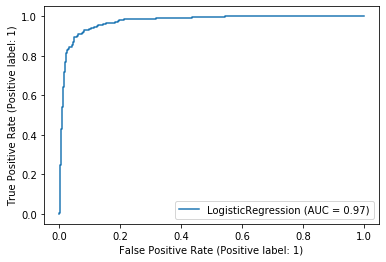

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(reg_spam, X_spam_test, y_spam_test) 
plt.show()

## 3d)

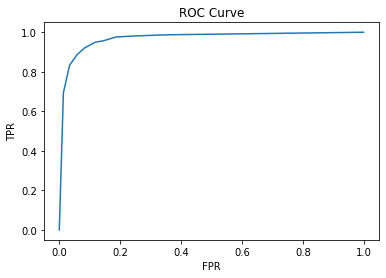

In [20]:
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

tpr_points = []
fpr_points = []

for t in thresholds:
    y_spam_pred_t = []
    for prob in prob_results_spam:
        if (prob[1] > t):
            y_spam_pred_t.append(1)
        else:
            y_spam_pred_t.append(0)
            
    cm_spam_t = metrics.confusion_matrix(y_spam_test, y_spam_pred_t)
    tpr_points.append(cm_spam_t[0][0] / (cm_spam_t[0][0] + cm_spam_t[0][1]))
    fpr_points.append(cm_spam_t[1][0] / (cm_spam_t[1][0] + cm_spam_t[1][1]))

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC Curve')
ax.plot(fpr_points, tpr_points)

#### The diffrenences are mostly in the smoothness of the curve, in which mine is smoother given that it has far less points. The way to make it more similar would be to add more points for each specific threshold (eg. T = 0, T =.00000001, ... T = 1).

# Problem 4
## 4a)

In [87]:
def CV_k(k, model, X, y):
    partition_size = len(y.values) / k
    error = 0
    for idx in range(k):
        X_train = X.copy()
        X_test = pd.DataFrame(columns=columns_spam)
        y_train = y.copy()
        y_test = pd.DataFrame(columns=['class'])
        for jdx in range(len(y.values)):
            if (jdx >= idx * partition_size and jdx < (idx + 1) * partition_size):
                df_x_temp = pd.DataFrame([X.iloc[jdx].values], columns=columns_spam, index=[jdx])
                X_test = pd.concat([X_test, df_x_temp], axis=0)
                X_train = X_train.drop([jdx])
                df_y_temp = pd.DataFrame([y.iloc[jdx]], columns=['class'], index=[jdx])
                y_test = pd.concat([y_test, df_y_temp], axis=0)
                y_train = y_train.drop([jdx])
        if model:
            clf = LogisticRegression()
        else:
            clf = LinearDiscriminantAnalysis()
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        mistakes = 0
        for jdx in range(len(y_test.values)):
            if(y_test.values[idx][0] != pred[idx]):
                mistakes += 1
        error += mistakes / len(y_test.values)
    error /= k
    return error

## 4b)

In [89]:
k = [5, 10]
model = [True, False]
model_name = ["Logistic Regression", "LDA"]
for i in range(2):
    for j in range(2):
        print("Error for " + model_name[j] + " with k=" + str(k[i]) + " is " + str(CV_k(k[i], model[j], X_spam, y_spam)))

Error for Logistic Regression with k=5is 0.4
Error for LDA with k=5is 0.4
Error for Logistic Regression with k=10is 0.2
Error for LDA with k=10is 0.3


In [86]:
CV_k(5, True, X_spam, y_spam)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

## 4c)

#### Logistic Regression seems to perform marginally better. Again, this is likely due to LDA being generative with only two classes.